CITY:
 - Tipo de dato
 - Cantidad de nulos
 - Cantidad de Vacios
 - Cantidad de datos unicos
 - Cantidad de datos totales

In [1]:
import pandas as pd

# Cargar únicamente la columna 'city' del archivo CSV
file_path = "../0_Dataset/Listings.csv"
data = pd.read_csv(file_path, usecols=['city','property_type'], delimiter=',', encoding='latin-1')
# Verificar si la columna 'city' existe en el DataFrame
if 'city' in data.columns:
    # Tipo de dato
    tipo_dato = data['city'].dtype
    
    # Cantidad de nulos
    cantidad_nulos = data['city'].isna().sum()
    
    # Cantidad de vacíos (considerando cadenas vacías)
    cantidad_vacios = (data['city'] == '').sum()
    
    # Cantidad de datos únicos
    cantidad_unicos = data['city'].nunique()
    
    # Cantidad de datos totales
    cantidad_totales = data['city'].shape[0]
    
    # Imprimir resultados
    print(f"Columna 'city':")
    print(f" - Tipo de dato: {tipo_dato}")
    print(f" - Cantidad de nulos: {cantidad_nulos}")
    print(f" - Cantidad de vacíos: {cantidad_vacios}")
    print(f" - Cantidad de datos únicos: {cantidad_unicos}")
    print(f" - Cantidad de datos totales: {cantidad_totales}")
else:
    print("La columna 'city' no existe en el DataFrame.")

Columna 'city':
 - Tipo de dato: object
 - Cantidad de nulos: 0
 - Cantidad de vacíos: 0
 - Cantidad de datos únicos: 10
 - Cantidad de datos totales: 279712


Obtener Frecuencia Absoluta, Frecuencia Relativa y la Moda


In [2]:
if 'city' in data.columns: 
    # Moda
    moda = data['city'].mode()[0]
    
    # Cantidad por variable
    cantidad_por_variable = data['city'].value_counts()
    
    # Porcentaje por variable
    porcentaje_por_variable = (cantidad_por_variable / cantidad_totales) * 100
    
    # Imprimir resultados formateados
    print(f"Columna 'city':")
    print(f" - Moda: {moda}\n")
    print(" - Cantidad por variable:")
    for valor, cantidad in cantidad_por_variable.items():
        print(f"   {valor}: {cantidad}")
    print("\n - Porcentaje por variable:")
    for valor, porcentaje in porcentaje_por_variable.items():
        print(f"   {valor}: {porcentaje:.2f}%")
else:
    print("La columna 'city' no existe en el DataFrame.")

Columna 'city':
 - Moda: Paris

 - Cantidad por variable:
   Paris: 64690
   New York: 37012
   Sydney: 33630
   Rome: 27647
   Rio de Janeiro: 26615
   Istanbul: 24519
   Mexico City: 20065
   Bangkok: 19361
   Cape Town: 19086
   Hong Kong: 7087

 - Porcentaje por variable:
   Paris: 23.13%
   New York: 13.23%
   Sydney: 12.02%
   Rome: 9.88%
   Rio de Janeiro: 9.52%
   Istanbul: 8.77%
   Mexico City: 7.17%
   Bangkok: 6.92%
   Cape Town: 6.82%
   Hong Kong: 2.53%


<Figure size 1400x800 with 0 Axes>

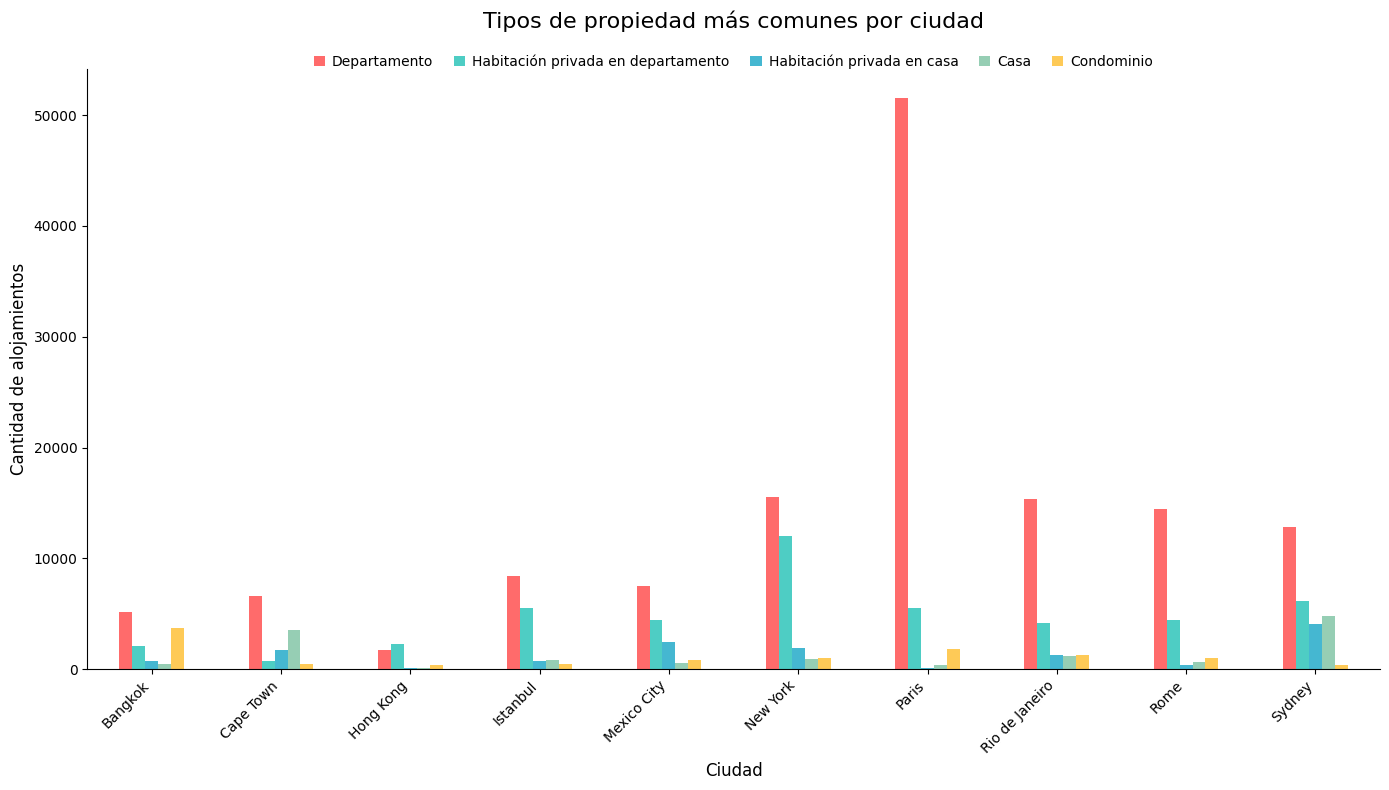

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Preparar los datos
tabla = pd.crosstab(data['city'], data['property_type'])
tabla_filtrada = tabla[tabla.sum().sort_values(ascending=False).head(5).index]

# Traducir nombres de columnas al español
traduccion_tipos = {
    'Entire apartment': 'Departamento',
    'Private room in apartment': 'Habitación privada en departamento',
    'Private room in house': 'Habitación privada en casa',
    'Entire house': 'Casa',
    'Entire condominium': 'Condominio'
}

# Renombrar las columnas
tabla_filtrada.columns = [traduccion_tipos.get(col, col) for col in tabla_filtrada.columns]

# Colores vibrantes
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FECA57']

plt.figure(figsize=(14, 8))
ax = tabla_filtrada.plot(kind='bar', figsize=(14, 8), color=colors)

plt.title("Tipos de propiedad más comunes por ciudad", fontsize=16, pad=30)
plt.ylabel("Cantidad de alojamientos", fontsize=12)
plt.xlabel("Ciudad", fontsize=12)
plt.xticks(rotation=45, ha='right')

# Eliminar el contorno del gráfico (spines)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)

# Leyenda horizontal en una sola línea, separada del título
plt.legend(bbox_to_anchor=(0.5, 0.98), 
          loc='lower center', 
          ncol=5,  # Todas las categorías en una fila
          frameon=False,  # Sin marco
          handlelength=0.8,  # Cuadrados más pequeños
          handletextpad=0.5,  # Espacio entre cuadrado y texto
          columnspacing=1.5)  # Espacio entre columnas

plt.tight_layout()
plt.show()

<Figure size 1400x800 with 0 Axes>

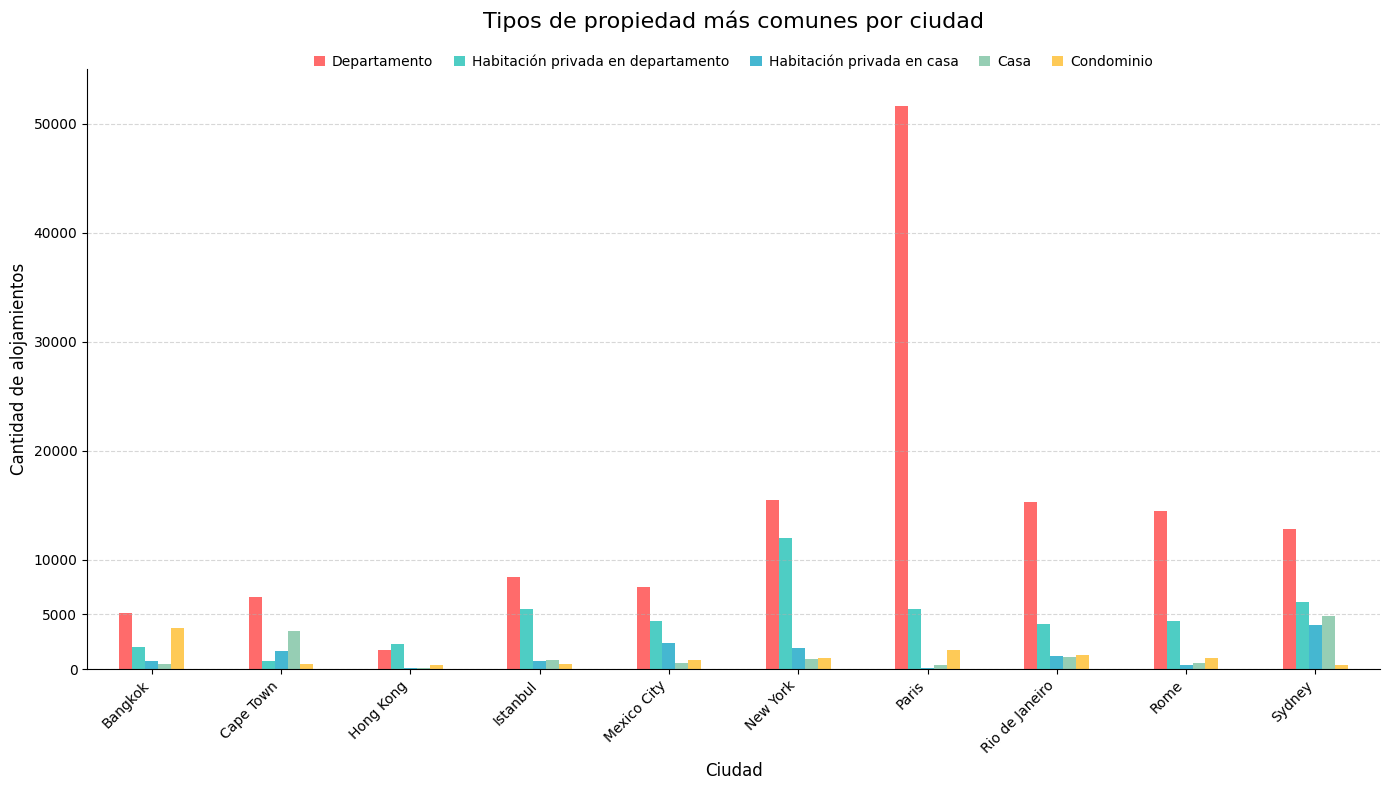

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Preparar los datos
tabla = pd.crosstab(data['city'], data['property_type'])
tabla_filtrada = tabla[tabla.sum().sort_values(ascending=False).head(5).index]

# Traducir nombres de columnas al español
traduccion_tipos = {
    'Entire apartment': 'Departamento',
    'Private room in apartment': 'Habitación privada en departamento',
    'Private room in house': 'Habitación privada en casa',
    'Entire house': 'Casa',
    'Entire condominium': 'Condominio'
}

# Renombrar las columnas
tabla_filtrada.columns = [traduccion_tipos.get(col, col) for col in tabla_filtrada.columns]

# Colores vibrantes
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FECA57']

plt.figure(figsize=(14, 8))
ax = tabla_filtrada.plot(kind='bar', figsize=(14, 8), color=colors)

plt.title("Tipos de propiedad más comunes por ciudad", fontsize=16, pad=30)
plt.ylabel("Cantidad de alojamientos", fontsize=12)
plt.xlabel("Ciudad", fontsize=12)
plt.xticks(rotation=45, ha='right')

# Establecer límites del eje Y y ticks personalizados
ax.set_ylim(0, 55000)
ax.set_yticks([0, 5000, 10000, 20000, 30000, 40000,50000])

# Líneas de grilla en los valores seleccionados
ax.yaxis.grid(True, which='major', linestyle='--', alpha=0.5)

# Eliminar contornos
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)

# Leyenda horizontal y estilizada
plt.legend(bbox_to_anchor=(0.5, 0.98), 
           loc='lower center', 
           ncol=5,
           frameon=False,
           handlelength=0.8,
           handletextpad=0.5,
           columnspacing=1.5)

plt.tight_layout()
plt.show()
